# 1. Align with Original Image

Image lit is jw01345-o002-t022 == f115w, f150w, f200w
<br> The reference image will be f115w

Get an Image list 

In [4]:
img_source = ["/data/jip/2023-02-06/img/original-big-image/jw01345-o002_t022_nircam_clear-f200w_i2d.fits"]
img_target = ["/data/jip/2023-02-06/img/original-big-image/jw01345-o002_t022_nircam_clear-f115w_i2d.fits"]
source_band = ['f200w']

In [5]:
import astroalign as aa
from astropy.io import fits
source_sci = fits.getdata(img_source[0], ext=1)
target_sci = fits.getdata(img_target[0], ext=1)
# registred image is a transformed image of source that will match to target 
source_wht = fits.getdata(img_source[0], ext=4)
target_wht = fits.getdata(img_target[0], ext=4)

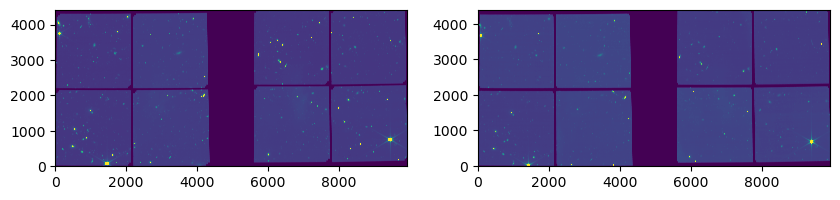

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(source_sci, vmin=0, vmax=1, origin='lower')
ax[1].imshow(target_sci, vmin=0, vmax=1, origin='lower')

little process of data to do astroalign

In [7]:
source_sci = source_sci.byteswap().newbyteorder()
target_sci = target_sci.byteswap().newbyteorder()

In [8]:
source_wht = source_wht.byteswap().newbyteorder()
target_wht = target_wht.byteswap().newbyteorder()

# 2. Get an point to point correspondence

In [9]:
import numpy as np 
import astroalign as aa

src = np.array([(2050.331,4201.5602),
(1771.6943,4200.294),
(1423.2359,3768.5435),
(1353.4284,3735.4899),
(756.76608,3268.4889),
(747.37939,3115.4319),
(645.46277,3110.4004),
(637.58317,3307.4167),
(3509.4366,982.61149),
(3276.2022,976.42102),
(4215.4718,632.7229),
(4154.3367,723.32957),
(4292.2726,781.25933),
(7616.5402,1000.401),
(7457.2703,928.26724),
(7392.7266,810.52514),
(7273.4361,819.30791),
(7209.4166,835.49792),
(6412.118,3417.5955),
(6270.4132,3228.5137),
(6265.137,3545.009),
(6067.5208,3484.4854),
(9775.9376,3438.5176),
(8167.7826,2813.5398),
(8400.6685,4188.647),
(8600.3346,621.66804),
(8319.1712,490.16941),
(6996.466,613.71668),
(6898.4406,664.51891),
(800.67459,1140.1583),
(733.292,974.47331),
(607.3596,928.30196),
(555.82977,1038.1438),
(339.90111,1200.6084),
(359.38871,1076.4842),
(265.26059,1043.1181),
(242.27699,1123.4453),
]) #F200
dst = np.array([(1997.1806,4138.3911),
(1719.3326,4136.4634),
(1370.5468,3704.4716),
(1301.433,3672.4858),
(704.41324,3205.4938),
(694.585,3051.6245),
(592.75629,3047.2301),
(584.69019,3243.5833),
(3456.7235,919.44031),
(3223.3454,912.06393),
(4163.5323,569.4113),
(4101.7367,659.45286),
(4239.3242,718.15875),
(7564.4224,936.44618),
(7404.4536,864.62612),
(7340.3815,746.9727),
(7221.4474,755.64177),
(7156.6256,771.46648),
(6359.3957,3353.5547),
(6217.3912,3165.2936),
(6212.3288,3481.4128),
(6014.5293,3420.757),
(9723.3394,3374.4764),
(8114.4884,2750.4913),
(8347.4623,4125.4482),
(8547.3099,558.05822),
(8266.544,426.58441),
(6943.5954,549.77439),
(6844.4898,600.49708),
(747.63477,1076.6655),
(680.52122,911.56113),
(554.31374,864.72708),
(502.67791,974.6941),
(287.42048,1137.5039),
(306.53751,1012.43),
(213.04431,979.31604),
(190.30757,1059.560)
]) #F115
tform = aa.estimate_transform('projective', src, dst)

In [10]:
registered_image_sci = aa.apply_transform(tform, source_sci, target_sci)

In [11]:
registered_image_wht = aa.apply_transform(tform, source_wht, target_wht)

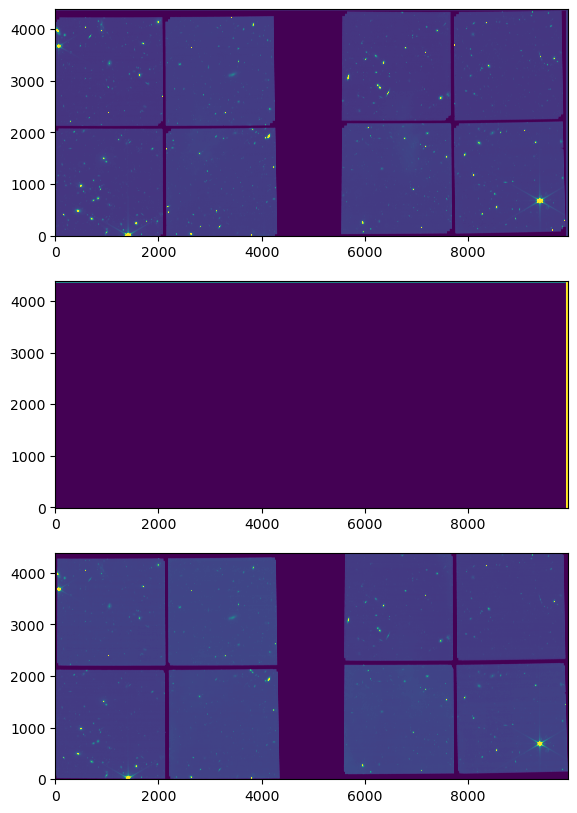

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].imshow(registered_image_sci[0], vmin=0, vmax=1, origin='lower')
ax[1].imshow(registered_image_sci[1], vmin=0, vmax=1, origin='lower')
ax[2].imshow(target_sci, vmin=0, vmax=1, origin='lower')

# 3. Save align image

In [13]:
# making cutout fits 
Primhdu = fits.PrimaryHDU()
Primhdu.header.update(fits.getheader(img_source[0]), ext=0)

Imhdu = fits.ImageHDU()
Imhdu.data = registered_image_sci[0]
Imhdu.header.update(fits.getheader(img_source[0], ext=1))

Imhdu2 = fits.ImageHDU()
Imhdu2.data = registered_image_wht[0]
Imhdu2.header.update(fits.getheader(img_source[0], ext=4))

Newhdu = fits.HDUList([Primhdu, Imhdu, Imhdu2])
Newhdu.writeto("jw01345-o002_t022_nircam_clear_{}_aligned.fits".format(source_band[0]), overwrite=True)